# Import the Libraries

In [ ]:
# Libraries for manage the file in os and in the gdrive.
from google.colab import drive
import os

# For read the image
import glob as gb

# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for do computational things
import numpy as np
import pandas as pd


import datetime

# For evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for Deep learning tasks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
# from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

# Mount Gdrive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Take a look into our Dataset

If you curious about the dataset, you can access our dataset from this [Link](https://drive.google.com/drive/folders/1OY_yLf77Soy921W_aASRYItxq4ukeXil?usp=sharing). My friends collect the dataset from various source, such as dermnet, google search images, and many more. 

In [ ]:


DATASET_PATH = '/content/gdrive/MyDrive/dataset/Acne'

os.listdir(DATASET_PATH)

['train', 'test', 'val']

In [ ]:
TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
TEST_DIR = os.path.join(DATASET_PATH, 'test')
VAL_DIR = os.path.join(DATASET_PATH, 'val')

In [ ]:
import glob as gb
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [ ]:
print("TRAIN DIR")
img_count_in_folder(TRAIN_DIR)

TRAIN DIR
----------------------------------------------------------------------
 209 gambar yang ditemukan di dalam folder Comedonal
 205 gambar yang ditemukan di dalam folder Vulgaris
----------------------------------------------------------------------


In [ ]:
print("VAL DIR")
img_count_in_folder(VAL_DIR)

VAL DIR
----------------------------------------------------------------------
  70 gambar yang ditemukan di dalam folder Comedonal
  63 gambar yang ditemukan di dalam folder Vulgaris
----------------------------------------------------------------------


In [ ]:
print("TEST DIR")
img_count_in_folder(TEST_DIR)

TEST DIR
----------------------------------------------------------------------
  70 gambar yang ditemukan di dalam folder Comedonal
  68 gambar yang ditemukan di dalam folder Vulgaris
----------------------------------------------------------------------


In [ ]:
def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[7]) 
    
  plt.show()

In [ ]:
def list_files(dir):
  arr=[]
  for root,dirs, files in os.walk(dir):
    for name in files:
      if name.endswith('.jpg'):
        arr.append(os.path.join(root, name))
        break
  return arr

<Figure size 432x288 with 0 Axes>

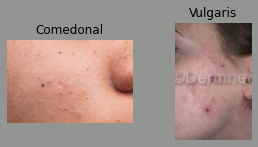

In [ ]:
img_list= list_files(TRAIN_DIR)
show_images(img_list)

In [ ]:
img_list =['/content/gdrive/MyDrive/dataset/Acne/train/Comedonal/comedonal-1.jpg', '/content/gdrive/MyDrive/dataset/Acne/train/Comedonal/comedonal-2.jpg']

# Do Image Segmentation '3'

I applied the image segmentation from this article.

- https://nayakpplaban.medium.com/image-segmentation-using-opencv-39013013920a

(-0.5, 149.5, 149.5, -0.5)

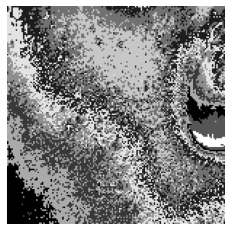

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.cluster import KMeans

# fig = plt.figure(figsize=()
filename = '04l5I8TqdzF9WDMJ.png'

img = image.load_img(
    img_list[0],
    target_size=(150, 150)
)




x = image.img_to_array(img)/255
# x = np.expand_dims(x, axis=0)
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])



# ax = fig.add_subplot(n_files, 1, i+1)
plt.imshow(x_segment,'gray')
plt.axis(False)

(-0.5, 149.5, 149.5, -0.5)

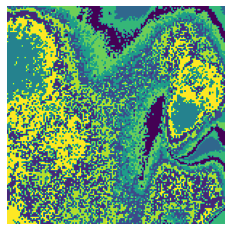

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.cluster import KMeans

# fig = plt.figure(figsize=()
filename = '04l5I8TqdzF9WDMJ.png'

img = image.load_img(
    img_list[1],
    target_size=(150, 150)
)




x = image.img_to_array(img)/255
# x = np.expand_dims(x, axis=0)
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])



# ax = fig.add_subplot(n_files, 1, i+1)
plt.imshow(x_segment)
plt.axis(False)

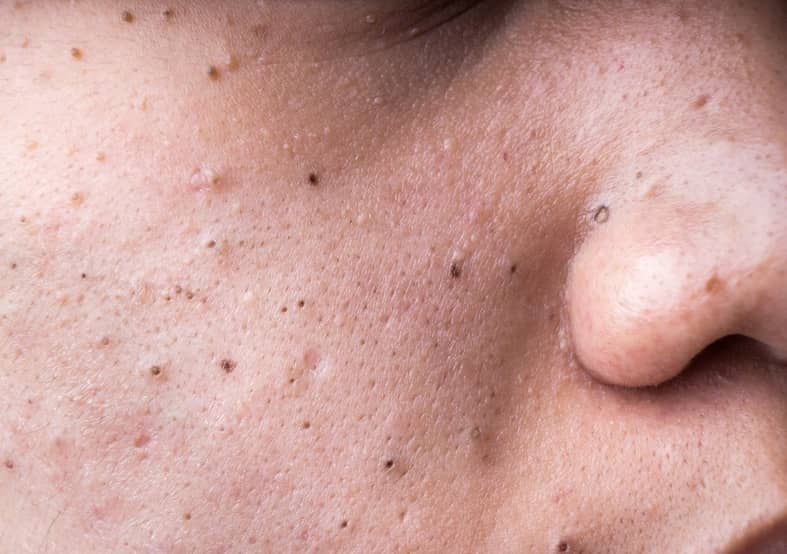

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(img_list[1])
cv2_imshow(img)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(435998, 3)


In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
k=4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

<function matplotlib.pyplot.show>

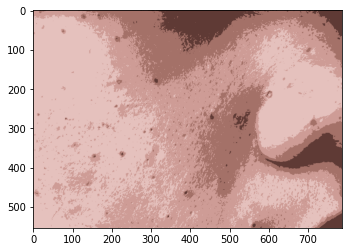

In [ ]:
centers=np.uint8(centers)
labels = labels.flatten()

segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)
plt.imshow(segmented_img)
plt.show

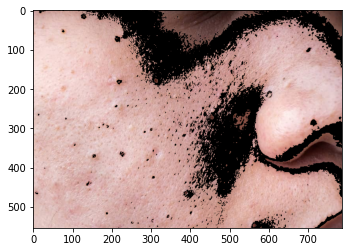

In [ ]:
masked_img =  np.copy(img)
masked_img = masked_img.reshape((-1, 3))
cluster = 2
masked_img[labels==cluster] = [0, 0, 0]
masked_img = masked_img.reshape(img.shape)

plt.imshow(masked_img)
plt.show()

In [ ]:
def img_segmentation(img, k=4):
  # img = cv2.imread(img_path)
  # img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
  # img = img_path
  pixel_values = img.reshape((-1, 3))
  pixel_values = np.float32(pixel_values)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers=np.uint8(centers)
  labels = labels.flatten()
  segmented_img = centers[labels.flatten()]
  segmented_img = segmented_img.reshape(img.shape)
  masked_img =  np.copy(img)
  masked_img = masked_img.reshape((-1, 3))
  cluster = 2
  masked_img[labels==cluster] = [0, 0, 0]
  masked_img = masked_img.reshape(img.shape)

  return masked_img


# img_segment = img_segmentation(img_list[0])
# plt.imshow(img_segment)

# Image-preProcessing

In [ ]:
# Datagen for validation set dan training set
datagen = ImageDataGenerator(preprocessing_function=img_segmentation,
                             rescale = 1./255,
                             rotation_range = 25,
                             zoom_range = [0.5, 1.1],
                             width_shift_range=0.15, 
                             shear_range= 0.15,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )

# ImageDataGenerator for test set
val_datagen = ImageDataGenerator(preprocessing_function=img_segmentation,
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42)

Found 420 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(VAL_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,)

Found 140 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(TEST_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,)

Found 140 images belonging to 2 classes.


In [ ]:
# # Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_test and y_test
X_test, y_test = test_set.next()

# Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [ ]:
X_train.shape

(64, 224, 224, 3)

In [ ]:
class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
  labels=[]
  y_label = np.argmax(y, axis=1)
  
  for label in y_label:
    labels.append(class_dict[label])

  for idx in range(0,10):
      plt.figure(figsize=(5, 5))
      plt.imshow(X[idx])
      plt.title(labels[idx])

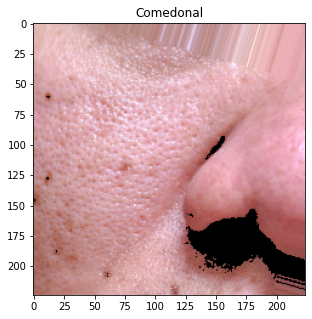

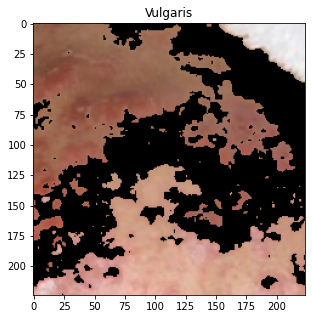

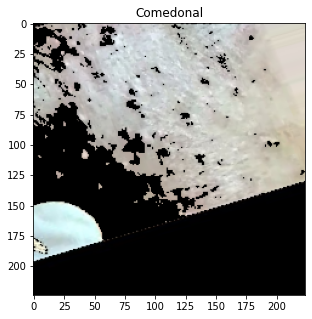

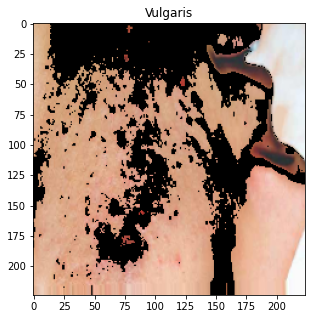

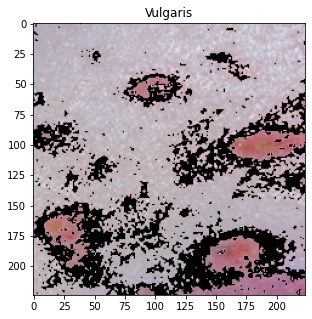

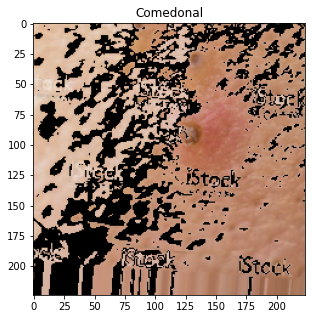

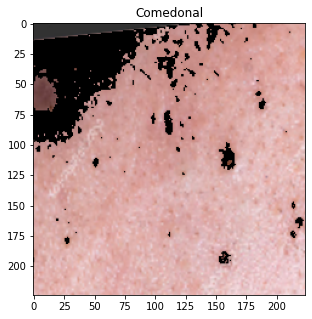

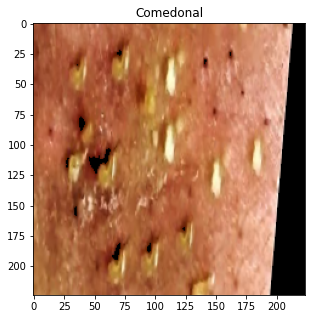

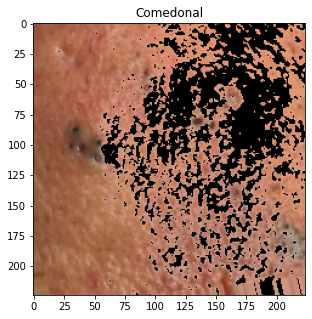

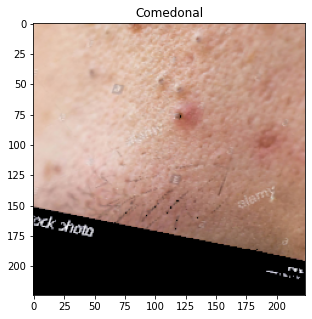

In [ ]:
plot_augmented_imgs(X_train, y_train)

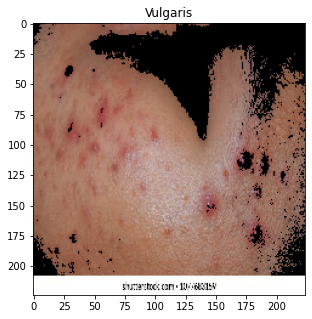

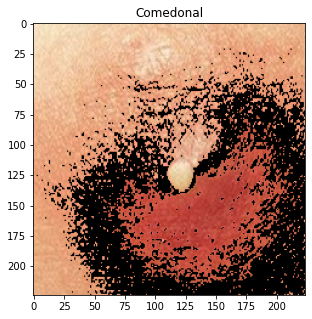

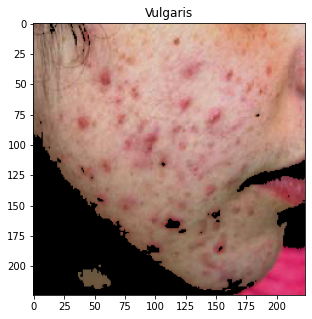

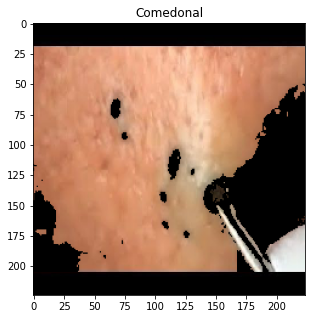

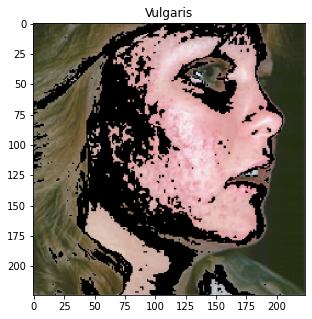

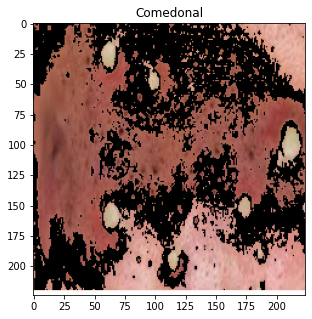

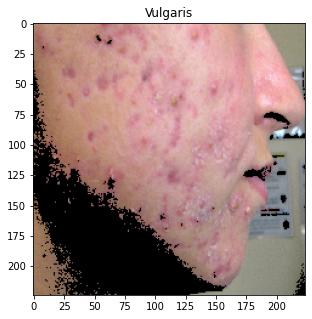

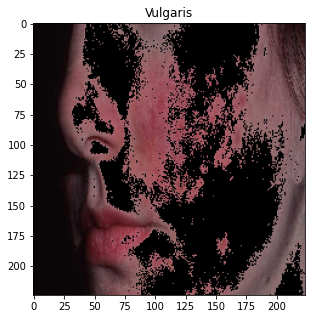

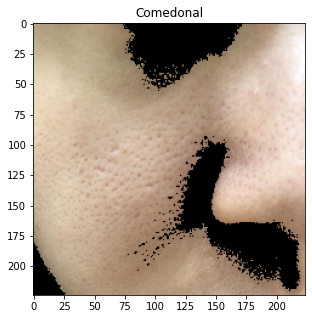

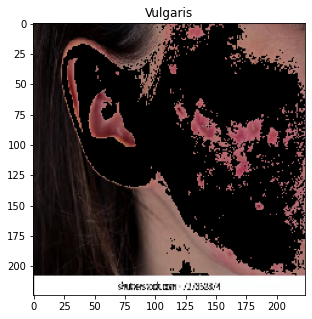

In [ ]:
plot_augmented_imgs(X_val, y_val)

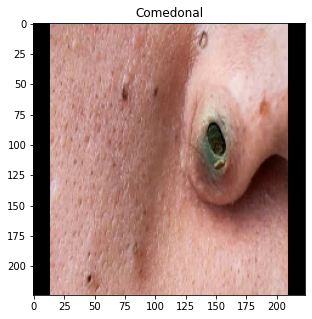

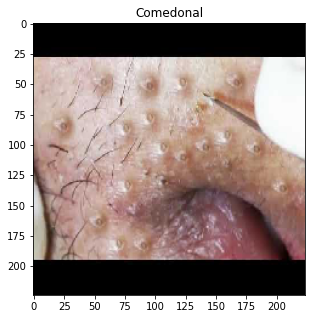

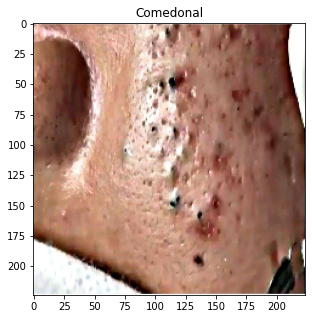

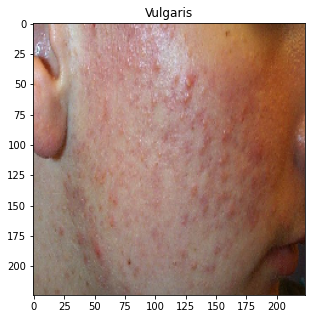

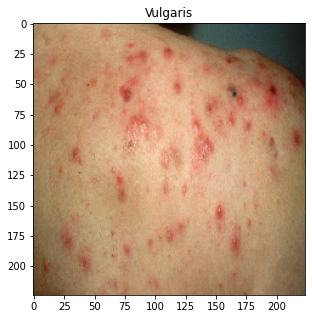

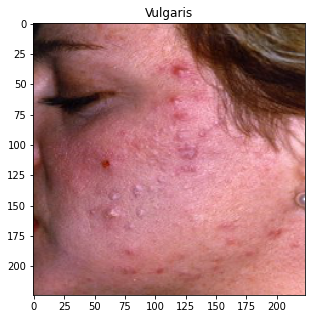

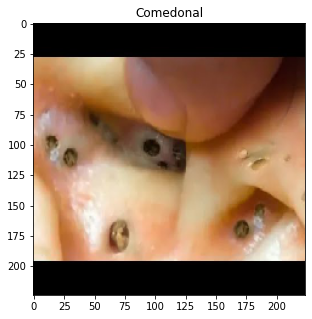

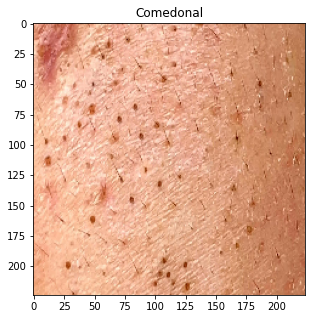

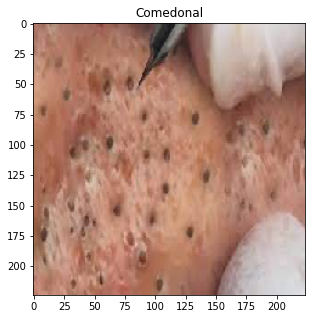

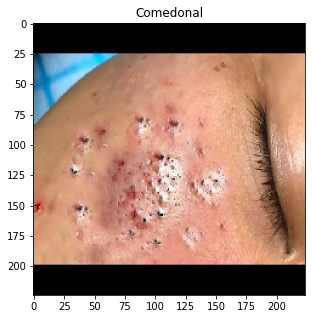

In [ ]:
plot_augmented_imgs(X_test, y_test)

# Build the Model

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=1e-8)
checkpoint_cb = ModelCheckpoint("/content/gdrive/MyDrive/model/MobileNetV2/current_best_model.h5", saved_best_only=True)
early_stop_cb = EarlyStopping(patience=10,monitor='val_loss', restore_best_weights= True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/ 

callbacks =[reduce_lr, checkpoint_cb, early_stop_cb, tensorboard_callback]


In [ ]:
test_set.class_indices

{'Comedonal': 0, 'Vulgaris': 1}

In [ ]:
def evaluate_model(model, X, y):
  print('Loss of the model is - ', model.evaluate(X, y)[0])
  print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')
  predict = model.predict(X)
  # print(predict)
  predict = np.argmax(predict, axis=1)
  predict = predict.reshape(1, -1)[0]
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, predict, target_names =['Comedonal', 'Vulgaris']))

  conf_matrix = confusion_matrix(y_label, predict)
  # print(conf_matrix)
  df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Comedonal', 'Vulgaris')],
                  columns = [i for i in ('Comedonal', 'Vulgaris')])
  plt.figure(figsize = (3, 3))
  sns.heatmap(df_cm, annot=True)

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'orange')
  val_acc_plot, = plt.plot(epochs, val_acc, 'blue')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'orange')
  val_loss_plot, = plt.plot(epochs, val_loss, 'blue')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_hist(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)

The code cell below is from the failed experiment. I tried to build model from scratch, but when the model performance is so bad(only 60% acc). So, i decide to use Transfer Learning with MobileNetV2

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout #importing layers

# model = Sequential([
#     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
#     # BatchNormalization(),
#     Conv2D(16, (3,3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     Conv2D(64, (3,3),  activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(256, (5,5), padding='same', activation='relu'),
#     Conv2D(256, (5, 5), padding='same', activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dense(2, activation='softmax')
# ])

In [ ]:
# model.summary()

In [ ]:
# import tensorflow as tf

# model.compile(
#     loss = 'categorical_crossentropy',
#     optimizer = tf.keras.optimizers.RMSprop(lr=1e-4, momentum=0.9),
#     metrics=['accuracy'],
# )

In [ ]:
# # Trains for 20 epochs
# hist = model.fit(train_set, epochs=100, validation_data = val_set, verbose = 1, callbacks=callbacks,
#           )

In [ ]:
# plot_hist(hist)

In [ ]:
# evaluate_model(model,X_test, y_test)

# Transfer Learning using MobileNetV2

The reason why i use this MobileNetV2 architecture because of the size of this architecture is realive small(only 14mb), so it suitable to deploy in Mobile Devices, like Android Application.

In [ ]:
base_model=MobileNetV2(weights='imagenet',input_shape=(224, 224, 3),include_top=False) #imports the MobileNetV2 model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation for N classes

model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False
optimizer=Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# Trains for 20 epochs
hist = model.fit(train_set, epochs=15, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/15
7/7 [==============================] - 450s 61s/step - loss: 1.3339 - accuracy: 0.5286 - val_loss: 0.6398 - val_accuracy: 0.5571
Epoch 2/15
7/7 [==============================] - 251s 37s/step - loss: 0.6056 - accuracy: 0.6857 - val_loss: 0.5768 - val_accuracy: 0.6786
Epoch 3/15
7/7 [==============================] - 247s 36s/step - loss: 0.5273 - accuracy: 0.7548 - val_loss: 0.4070 - val_accuracy: 0.8071
Epoch 4/15
7/7 [==============================] - 251s 37s/step - loss: 0.3865 - accuracy: 0.8238 - val_loss: 0.3236 - val_accuracy: 0.8571
Epoch 5/15
7/7 [==============================] - 250s 37s/step - loss: 0.3945 - accuracy: 0.8429 - val_loss: 0.8162 - val_accuracy: 0.6429
Epoch 6/15
7/7 [==============================] - 251s 37s/step - loss: 0.5300 - accuracy: 0.7571 - val_loss: 0.3613 - val_accuracy: 0.8429
Epoch 7/15
7/7 [==============================] - 250s 37s/step - loss: 0.3946 - accuracy: 0.8143 - val_loss: 0.3195 - val_accuracy: 0.8929
Epoch 8/15
7/7 [====

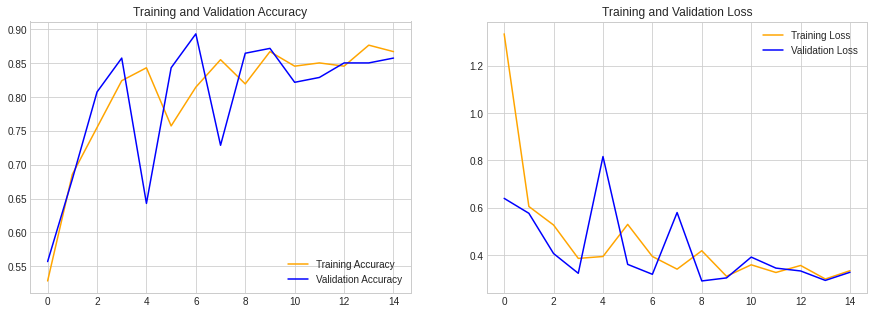

In [ ]:
plot_hist(hist)

2/2 [==============================] - 1s 42ms/step - loss: 0.3005 - accuracy: 0.9219
Loss of the model is -  0.30049192905426025
2/2 [==============================] - 0s 40ms/step - loss: 0.3005 - accuracy: 0.9219
Accuracy of the model is -  92.1875 %
              precision    recall  f1-score   support

   Comedonal       1.00      0.85      0.92        34
    Vulgaris       0.86      1.00      0.92        30

    accuracy                           0.92        64
   macro avg       0.93      0.93      0.92        64
weighted avg       0.93      0.92      0.92        64



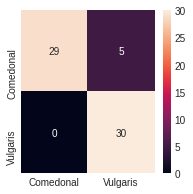

In [ ]:
evaluate_model(model, X_test, y_test)

2/2 [==============================] - 0s 53ms/step - loss: 0.3395 - accuracy: 0.8281
Loss of the model is -  0.339506059885025
2/2 [==============================] - 0s 47ms/step - loss: 0.3395 - accuracy: 0.8281
Accuracy of the model is -  82.8125 %
              precision    recall  f1-score   support

   Comedonal       0.89      0.75      0.81        32
    Vulgaris       0.78      0.91      0.84        32

    accuracy                           0.83        64
   macro avg       0.84      0.83      0.83        64
weighted avg       0.84      0.83      0.83        64



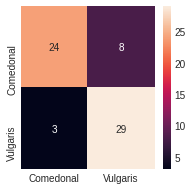

In [ ]:
evaluate_model(model, X_val, y_val)

2/2 [==============================] - 0s 58ms/step - loss: 0.2929 - accuracy: 0.9062
Loss of the model is -  0.29293501377105713
2/2 [==============================] - 0s 49ms/step - loss: 0.2929 - accuracy: 0.9062
Accuracy of the model is -  90.625 %
              precision    recall  f1-score   support

   Comedonal       0.94      0.89      0.91        35
    Vulgaris       0.87      0.93      0.90        29

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



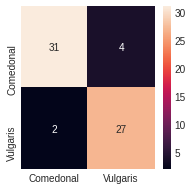

In [ ]:
evaluate_model(model, X_train, y_train)

The code cell below is from the failed experiment

In [ ]:
# for layer in model.layers[:20]:
#     layer.trainable=False
# for layer in model.layers[20:]:
#     layer.trainable=True
# optimizer=Adam()
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# # Trains for 20 epochs
# hist = model.fit(train_set, epochs=20, validation_data = val_set, verbose = 1, callbacks=callbacks,
#           )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
7/7 [==============================] - 286s 42s/step - loss: 0.6420 - accuracy: 0.7738 - val_loss: 0.2927 - val_accuracy: 0.8643
Epoch 2/20
7/7 [==============================] - 249s 39s/step - loss: 0.3377 - accuracy: 0.8548 - val_loss: 0.5239 - val_accuracy: 0.8857
Epoch 3/20
7/7 [==============================] - 252s 37s/step - loss: 0.3631 - accuracy: 0.8429 - val_loss: 2.8561 - val_accuracy: 0.7571
Epoch 4/20
7/7 [==============================] - 252s 37s/step - loss: 0.3369 - accuracy: 0.8857 - val_loss: 3.5763 - val_accuracy: 0.7429
Epoch 5/20
7/7 [==============================] - 254s 37s/step - loss: 0.3011 - accuracy: 0.8833 - val_loss: 3.4832 - val_accuracy: 0.6571
Epoch 6/20
7/7 [==============================] - 253s 37s/step - loss: 0.3158 - accuracy: 0.8881 - val_loss: 4.2745 - val_accuracy: 0.6071
Epoch 7/20
7/7 [==============================] - 249s 36s/step - loss: 0.2078 - accuracy: 0.9310 - val_loss: 6.3516 - val_accuracy: 0.7000
Epoch 8/20
7/7 [====

# Evaluate the Model

2/2 [==============================] - 1s 41ms/step - loss: 0.7325 - accuracy: 0.8281
Loss of the model is -  0.7325087785720825
2/2 [==============================] - 0s 41ms/step - loss: 0.7325 - accuracy: 0.8281
Accuracy of the model is -  82.8125 %
              precision    recall  f1-score   support

   Comedonal       1.00      0.68      0.81        34
    Vulgaris       0.73      1.00      0.85        30

    accuracy                           0.83        64
   macro avg       0.87      0.84      0.83        64
weighted avg       0.87      0.83      0.82        64



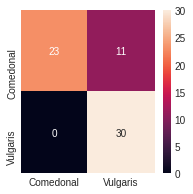

In [ ]:
evaluate_model(model,X_test, y_test)

# Check the Best Model from Training Process

In [ ]:
# Check the best model
import tensorflow as tf

best_model = tf.keras.models.load_model('/content/gdrive/MyDrive/model/MobileNetV2/current_best_model.h5')

In [ ]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

Evalute Kikuma best model

2/2 [==============================] - 1s 54ms/step - loss: 0.3005 - accuracy: 0.9219
Loss of the model is -  0.30049192905426025
2/2 [==============================] - 0s 53ms/step - loss: 0.3005 - accuracy: 0.9219
Accuracy of the model is -  92.1875 %
              precision    recall  f1-score   support

   Comedonal       1.00      0.85      0.92        34
    Vulgaris       0.86      1.00      0.92        30

    accuracy                           0.92        64
   macro avg       0.93      0.93      0.92        64
weighted avg       0.93      0.92      0.92        64



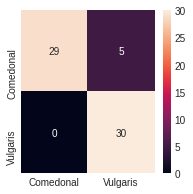

In [ ]:
evaluate_model(best_model, X_test, y_test)

It's show the overfitting, it's because our small dataset

In [ ]:
best_model.save('/content/gdrive/MyDrive/model/MobileNetV2/final_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/MobileNetV2/final_model/assets


In [ ]:
best_model.save('/content/gdrive/MyDrive/model/MobileNetV2/final_model/final_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Test with Random Image

Saving acne-closed-comedo-2.jpg to acne-closed-comedo-2.jpg
Saving acne-closed-comedo-003.jpg to acne-closed-comedo-003.jpg
Saving acne-closed-comedo-3.jpg to acne-closed-comedo-3.jpg
Saving acne-closed-comedo-4.jpg to acne-closed-comedo-4.jpg
Saving acne-closed-comedo-5.jpg to acne-closed-comedo-5.jpg
Saving acne-closed-comedo-6.jpg to acne-closed-comedo-6.jpg
Saving acne-closed-comedo-7.jpg to acne-closed-comedo-7.jpg
Saving acne-closed-comedo-8.jpg to acne-closed-comedo-8.jpg
Saving acne-closed-comedo-9.jpg to acne-closed-comedo-9.jpg
percentage:
[[0.10305252 0.8969475 ]]
percentage:
[[0.01507883 0.98492116]]
percentage:
[[0.02150735 0.9784927 ]]
percentage:
[[0.01018722 0.9898128 ]]
percentage:
[[0.13375899 0.86624104]]
percentage:
[[0.02453696 0.9754631 ]]
percentage:
[[0.08082544 0.9191746 ]]
percentage:
[[0.12594599 0.8740541 ]]
percentage:
[[0.04527982 0.9547202 ]]


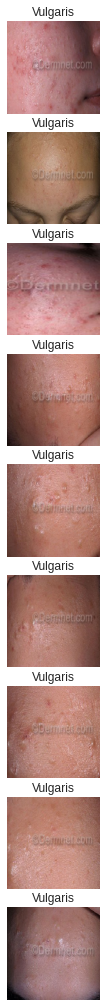

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

uploads = files.upload()

n_files = len(uploads)
fig = plt.figure(figsize=(2, 2 * n_files))

for i, filename in enumerate(uploads):
  img = image.load_img(
      filename,
      target_size=(224, 224)
  )
  x = image.img_to_array(img)/255
  x = np.expand_dims(x, axis=0)

  predict = model.predict(x)
  class_prediction = np.argmax(predict)
  prediction = class_dict[class_prediction]
  
  
  ax = fig.add_subplot(n_files, 1, i+1)
  ax.imshow(img)
  ax.set_title(prediction)
  ax.axis(False)
  print('percentage:')
  print(predict)

# Final Words

The model performance is still can be better if you trained the model on large datasets. You can also do difference approach method such as object detection to detect the Acne Disease. We've tried to use that method but because of the poor model performance, we decide drop that method and use this Image Classification. If you have any suggestion about how we can improve the model performance, you can contact me on my social media:

- [Linkedin](https://www.linkedin.com/in/haikalardikatama/)
